# Image compression with NMF

In [1]:
import cv2
from sklearn import decomposition    
import matplotlib.pyplot as plt 
import numpy as np
from skimage.metrics import structural_similarity
import imutils
from operator import itemgetter


def compress_image(n_components, img_gray):
    estimator = decomposition.NMF(n_components = n_components, init = 'random', tol=5e-3, max_iter=300)    
    W = estimator.fit_transform(img_gray)
    H = estimator.components_
    return np.dot(W,H)    

def assess_quality(file_path, file_name):
    components = list(np.arange(10, 200 + 1, 50))
    img_gray = cv2.imread(file_path + file_name, 0).astype('float64')
    _scores = []
    for n_components in components:
        compressed =  compress_image(n_components, img_gray).astype('float64')
        (score, diff) = structural_similarity(img_gray, compressed, full=True)
        _scores.append(score)
    scores = list(zip(components, _scores))
    
    # Plot the results
    fig = plt.figure(figsize=(15, 7))

    plt.plot(
        components,
        _scores,
        linewidth=3,
        color='#4287f5'
    )

    plt.xlabel("Components", fontsize=14)
    plt.ylabel("Similarity", fontsize=14)
    plt.title('Similarity by Components', fontsize=18)
    plt.xticks(np.arange(5, max(components) + 1, 5), fontsize=12)
    plt.yticks(fontsize=12)    
    plt.show()

def compress(file_path, file_name, n_components=20):
    img_original = cv2.imread(file_path + file_name)  

    img_gray = cv2.imread(file_path + file_name, 0)

    vmax = max(img_gray.max(), -img_gray.min())    
    fig, (ax, ax2, ax3) = plt.subplots(ncols=3)
    
    fig.set_size_inches(18.5, 10.5)
    
    ax.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    ax.set_title('Original')

    ax2.imshow(img_gray, cmap=plt.cm.gray)
    ax2.set_title('Preto e Branco')

    new_img = compress_image(n_components, img_gray)

    ax3.imshow(new_img, cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
    ax3.set_title('NMF {} componentes'.format(n_components))

    plt.show()
    
file_path = './data/fotos/'    

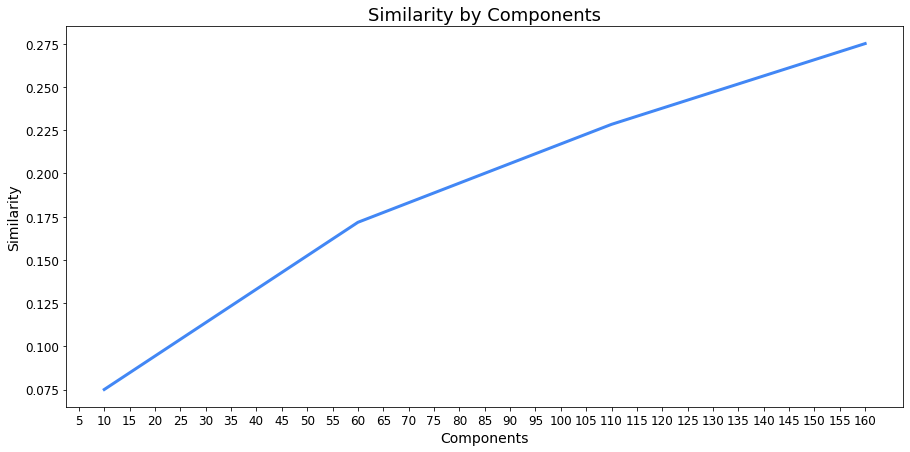

In [2]:
assess_quality(file_path, 'chico.jpg')

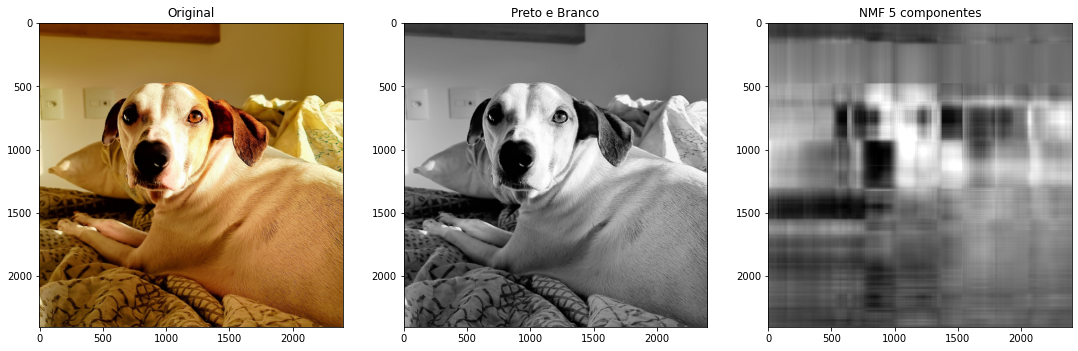

In [3]:
compress(file_path, 'chico.jpg', n_components=5)

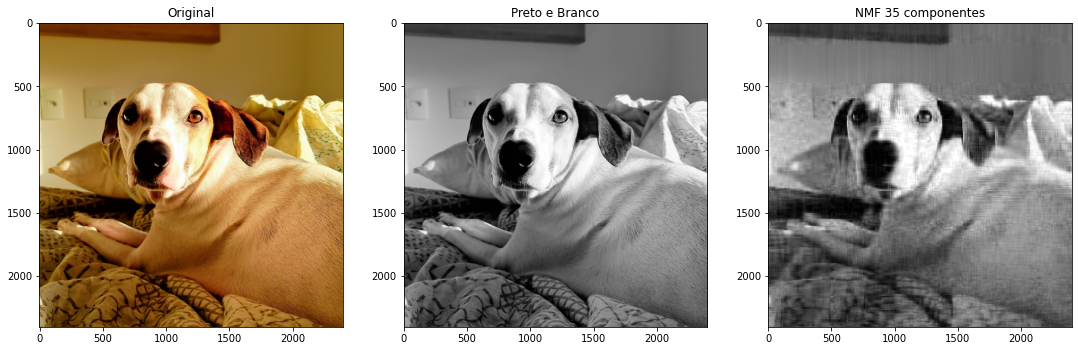

In [5]:
compress(file_path, 'chico.jpg', n_components=35)

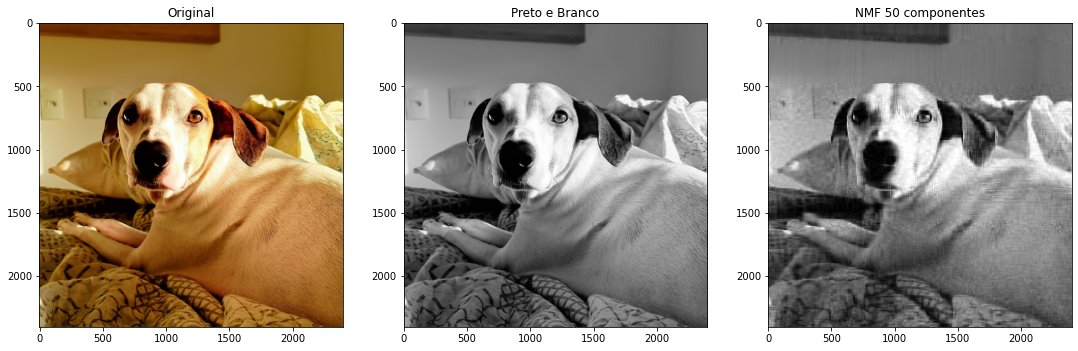

In [6]:
compress(file_path, 'chico.jpg', n_components=50)

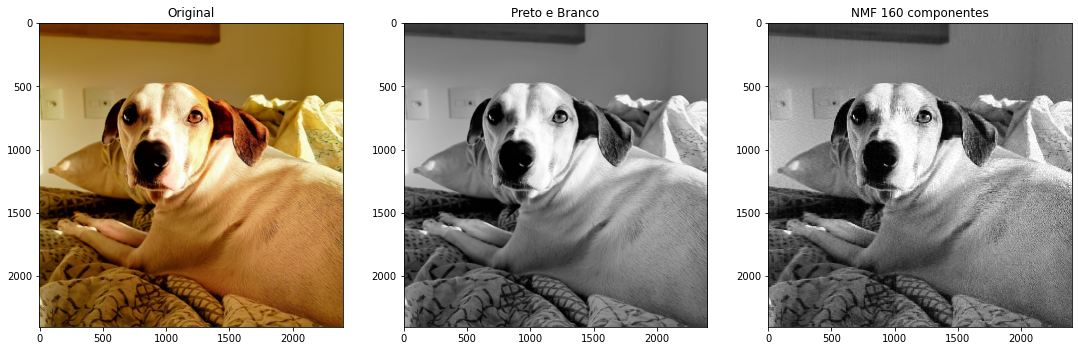

In [7]:
compress(file_path, 'chico.jpg', n_components=160)

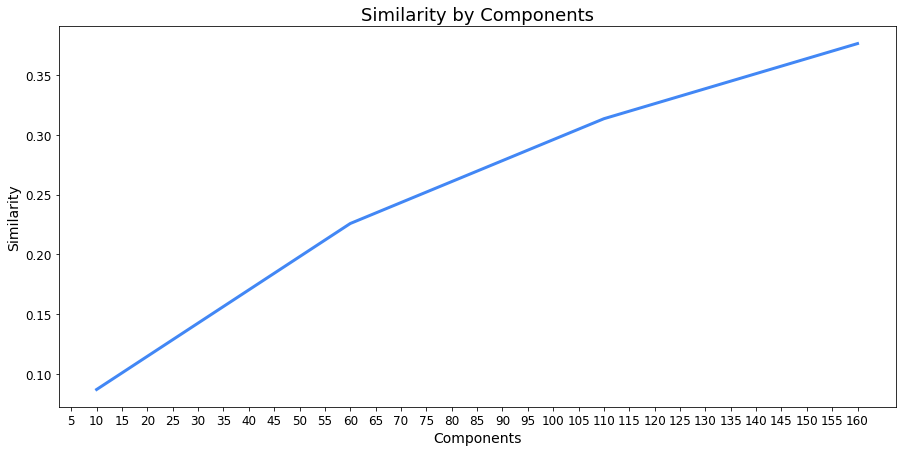

In [8]:
assess_quality(file_path, 'bento.jpg')

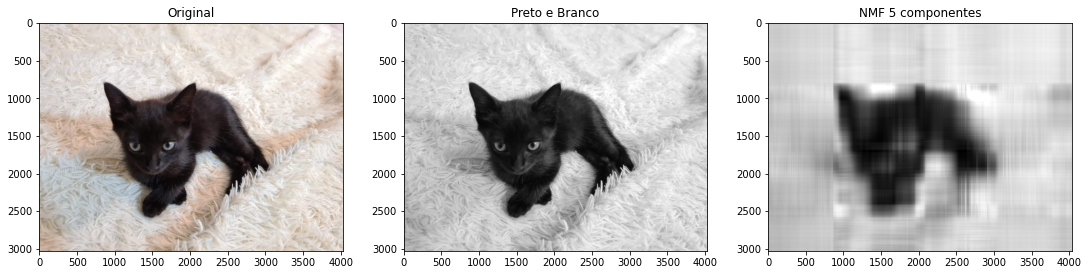

In [9]:
compress(file_path, 'bento.jpg', n_components=5)

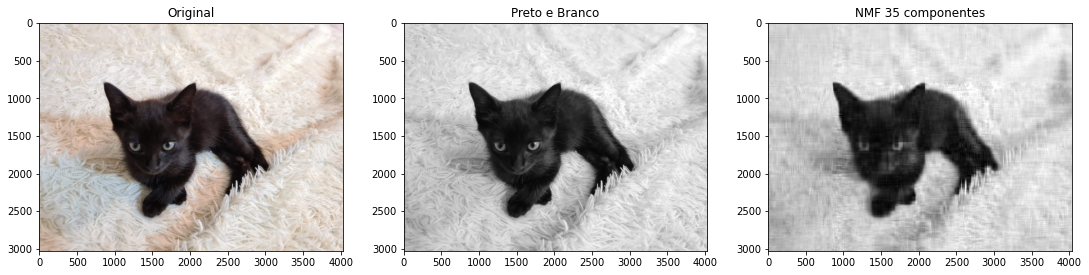

In [10]:
compress(file_path, 'bento.jpg', n_components=35)

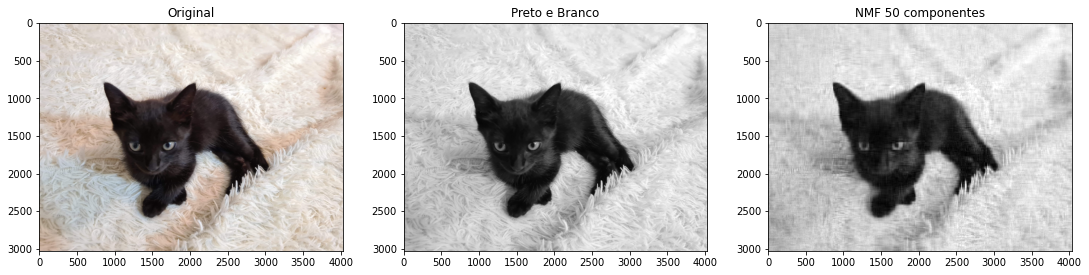

In [11]:
compress(file_path, 'bento.jpg', n_components=50)

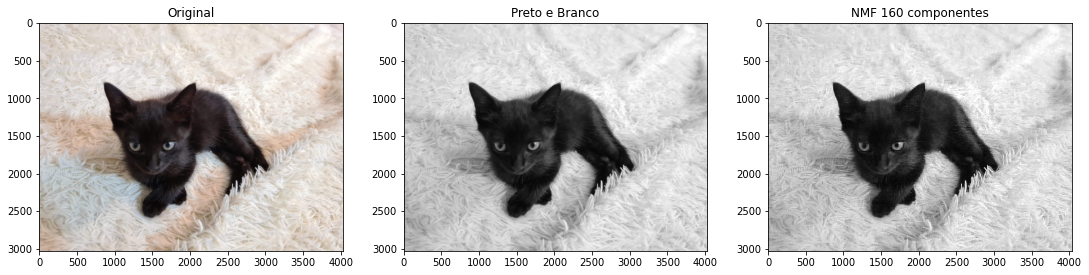

In [12]:
compress(file_path, 'bento.jpg', n_components=160)